In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers, initializers, regularizers, metrics
import numpy as np
import tensorflow as tf # 1.15.0 버전 사용
import os
import pandas as pd
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


이미지 불러오기

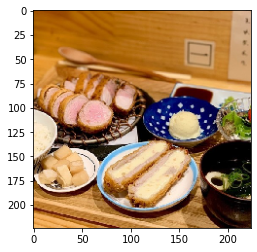

In [3]:
image = load_img('/content/drive/My Drive/test/food/okja/okja.png', target_size=(224, 224))
plt.imshow(image)

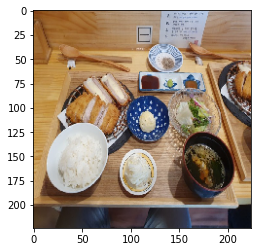

In [4]:
image = load_img('/content/drive/My Drive/test/food/okja/okja1.png', target_size=(224, 224))
plt.imshow(image)

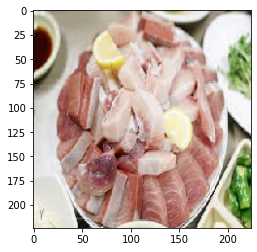

In [5]:
image = load_img('/content/drive/My Drive/test/food/badasarang/바다회사랑_1.png', target_size=(224, 224))
plt.imshow(image)

In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255
        )

In [24]:
train_datagenerator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/restaurant_project/train',
    target_size=(50,50),
    batch_size=1,
    class_mode='binary'
)

Found 308 images belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(
        rescale=1./255
        )

In [25]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/restaurant_project/test',
    target_size=(50,50),
    batch_size=1,
    class_mode='binary'
)

Found 64 images belonging to 2 classes.


In [43]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), input_shape=(50, 50, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(2))

model1.add(Activation('sigmoid'))

In [44]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [49]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)         

In [45]:
history1 = model1.fit_generator(
    train_datagenerator,
    steps_per_epoch=100/1,
    epochs= 60,
    validation_data=test_generator,
    verbose=True,
    validation_steps=5/1
)

Epoch 1/60
100/100 [==============================] - 1s 6ms/step - loss: 0.6774 - accuracy: 0.6400 - val_loss: 0.5461 - val_accuracy: 0.8000
Epoch 2/60
100/100 [==============================] - 1s 5ms/step - loss: 0.6952 - accuracy: 0.5700 - val_loss: 0.6126 - val_accuracy: 0.8000
Epoch 3/60
100/100 [==============================] - 0s 5ms/step - loss: 0.6368 - accuracy: 0.6300 - val_loss: 0.6066 - val_accuracy: 0.8000
Epoch 4/60
100/100 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6400 - val_loss: 0.7361 - val_accuracy: 0.4000
Epoch 5/60
100/100 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.6300 - val_loss: 0.6872 - val_accuracy: 0.8000
Epoch 6/60
100/100 [==============================] - 0s 5ms/step - loss: 0.6202 - accuracy: 0.6700 - val_loss: 0.4873 - val_accuracy: 1.0000
Epoch 7/60
100/100 [==============================] - 0s 5ms/step - loss: 0.5728 - accuracy: 0.7900 - val_loss: 0.7214 - val_accuracy: 0.6000
Epoch 

In [47]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
y_vloss=history1.history['val_loss']
y_loss= history1.history['loss']

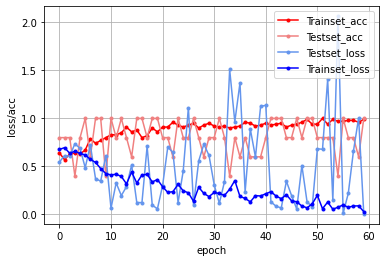

In [48]:
x_len=np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label = 'Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c= 'lightcoral', label = 'Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

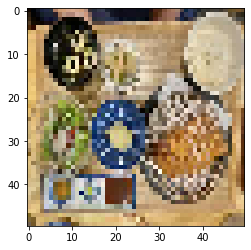

In [78]:
image = load_img('/content/drive/MyDrive/restaurant_project/test/okja_test/옥자회관_75.png', target_size=(50, 50))
plt.imshow(image)

In [88]:
x = img_to_array(image)/255  # (3, 150, 150) 크기의 NumPy 배열
x.reshape(1,50, 50, 3)

array([[[[0.06666667, 0.02745098, 0.        ],
         [0.        , 0.01176471, 0.03137255],
         [0.06666667, 0.08235294, 0.1254902 ],
         ...,
         [0.41960785, 0.32941177, 0.16470589],
         [0.45882353, 0.33333334, 0.17254902],
         [0.39607844, 0.30588236, 0.18039216]],

        [[0.17254902, 0.11764706, 0.06666667],
         [0.01176471, 0.01176471, 0.01176471],
         [0.03529412, 0.03529412, 0.06666667],
         ...,
         [0.39215687, 0.34509805, 0.25882354],
         [0.21568628, 0.18039216, 0.12156863],
         [0.16470589, 0.15294118, 0.09411765]],

        [[0.22745098, 0.15686275, 0.07843138],
         [0.04705882, 0.02745098, 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.44705883, 0.41568628, 0.3647059 ],
         [0.28235295, 0.2784314 , 0.2627451 ],
         [0.2784314 , 0.2784314 , 0.23921569]],

        ...,

        [[0.50980395, 0.41568628, 0.14117648],
         [0.7764706 , 0.65882355, 0.40784314]

In [80]:
test_okja = ImageDataGenerator(
        rescale=1./255
        )